## Australian Map Coloring Constraint Propagation Solver
> In this notebook we demonstrate solving the Australian coloring map puzzle using constraint propagation.

### Map Coloring Rules
> The puzzle objective is to color each region either red, green, or blue in such a way that no neighboring regions have the same color. 

<img src="images/australia.jpg" height="400px" width="400px" >


> To solve this puzzle we create constraint groups in sets of threes where three regions border each other and must be a different color.   There four such sets:

> * Western Australia, Nothern Territory and  South Australia
* Northern Terriory, South Australia and Queensland
* South Australia, Queensland and New South Wales
* South Australia, New South Wales and Victoria


> Looking af the following code snippets we can see how this was defined in our Australia class constructor.

```
        self.__X_name = dict()
        self.__X_name['WA'] = 'Western Australia'
        self.__X_name['NT'] = 'Northern Territory'
        self.__X_name['SA'] = 'South Australia'
        self.__X_name['QL'] = 'Queensland'
        self.__X_name['NSW'] = 'New South Wales'
        self.__X_name['VT'] = 'Victoria'
        
        ....
            other code
        ...
        
         *** Define Constraints *** 
        # Must be different color within constrain group
        #===============================================
        C = []

        #handle Western Australlia 
        C.append(['WA','NT','SA']) 

        #handle Northen Territory 
        C.append(['NT','SA','QL'])
        
        #handle South Australia 
        C.append(['SA','QL','NSW'])
        C.append(['SA','NSW','VT'])
```

### 1) Import map module

> The `map.py` module has a class called `Australia` to solve the Australian map coloring problem and inherits from the `ConstraintSolver` base abstract class.  The `Australia` class has a list of variables for each region and domain values of red, blue and green.  The constraints for the class are that no neighboring regions have the same color. 

> The `ConstraintSolver` abstract class defines two functions for reducing the problem using arc consistency and a function for searching for a solution when inference is not enough.

> * 	 The first reduction function is an elimination algorithm that removes any variable in the constraint that has a singleton domain and then removes that value from the domains of the remaining variables.  The second reduction function is an only-choice algorithm that assigns a value to a variable when that value does not fit in any of the other variables.


> * The search function is a depth-first recursive method that attempts to find a solution by choosing the variable with the least remaining values in its domain. It then iteratively assigns to this variable one of its domain values, and  calls the reduction functions to try and find a solution.  If a solution is found it returns this solved state, otherwise it returns false.


> * 	The `ConstraintSolver` abstract class also has other properties and methods to take advantage 

In [1]:
%load_ext autoreload
%aimport map
%autoreload 1

%matplotlib inline
from map import Australia

### 2) Solving The Map
> Our Australia class accepts a dictionary where the keys are the regions and values are the color.

> The regions codes are:
>  *   WA  =  Western Australia
>  *   NT  =  Northern Territory
>  *   SA  =  South Australia
>  *   QL  =  Queensland
>  *   NSW =  New South Wales
>  *   VT  =  Victoria


> The color codes are:
>  *   R  =  Red
>  *   B  =  Blue
>  *   G  =  Green

> #### Examples:
> Let try three examples to demonstrate how the `Australia` class works
> * Example 1 - In this example we set the Northern Territoty to green and the the `Australia` class will solve for the remaining colors.
> * Example 2 - In the second example we don't assign colors to any of the regions and the `Australia` class finds a solution.
> * Example 3 - For this example we assign the same color to two neighboring regions knowing that there is no possible solution.  We do this to see how the `Australia` class handles the situation.

###  Example 1
> Here we lets try and the solve the puzzle by first assigning the Nothern Territoy the color green.

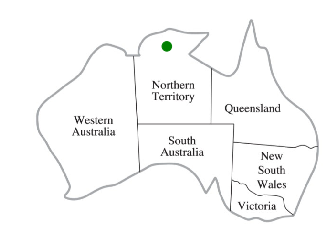

In [2]:
state = {'NT':'G'}
map1 = Australia(state)

# Display the original map
map1.display_org()

#### Let view the intial pre-processed state
> At the first the Australia class assigns all three colors to each empty

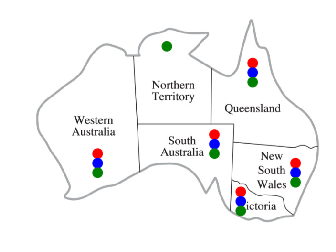

In [3]:
map1.display_state()

#### Let solve the puzzle
> We attempt to solve the puzzle by calling the ```solve()``` method

*** Puzzle was solved ***
-------------------------


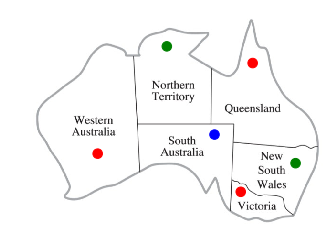

In [4]:
solved = map1.solve()
msg = "*** Puzzle was solved ***" if solved else "Puzzle was not solved"
print(msg)
print("-" * 25)
map1.display_state()

### Example 2
> This time lets not initialize any regions with a color.

Original state
-------------------------


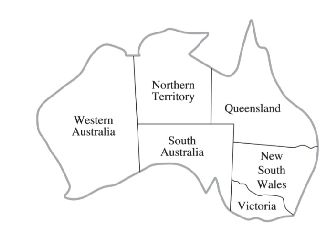

Initial pre-processed state
-------------------------


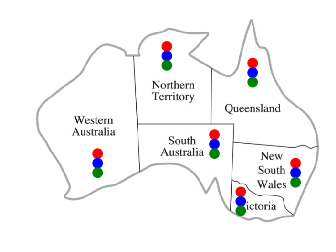

*** Puzzle was solved ***
-------------------------


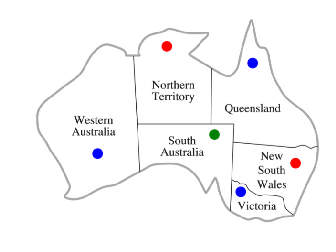

In [5]:
map2 = Australia()

# Display the original map
print("Original state")
print("-" * 25)
map2.display_org()

#display the initial state
print("Initial pre-processed state")
print("-" * 25)
map2.display_state()

#let solve the puzzle
solved = map2.solve()
msg = "*** Puzzle was solved ***" if solved else "Puzzle was not solved"
print(msg)
print("-" * 25)
map2.display_state()

### Example 3
> In this example we assign initial colors to two regions that we know violates our constraints.
> Green was assigned to both West Australia and Northern Territory.
>  When the `solve()` method is called the class will remove green from West Australia because green is already assigned to the Northering Territory. After removing green from West Australia there is no possible solution and the `solve()` method will return `False`. 

Original state
-------------------------


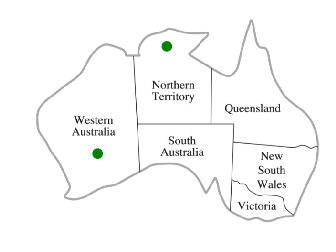

Initial pre-processed state
-------------------------


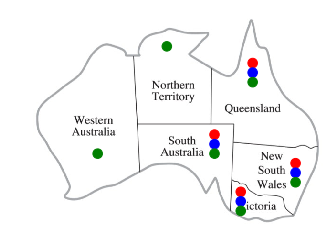

Puzzle was not solved
-------------------------


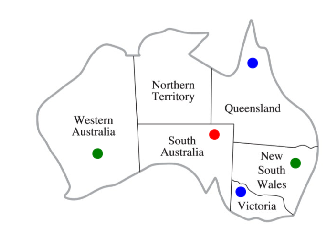

In [6]:
state = {'NT':'G','WA':'G'}
map3 = Australia(state)

# Display the original map
print("Original state")
print("-" * 25)
map3.display_org()

#display the initial state
print("Initial pre-processed state")
print("-" * 25)
map3.display_state()

#let solve the puzzle
solved = map3.solve()
msg = "*** Puzzle was solved ***" if solved else "Puzzle was not solved"
print(msg)
print("-" * 25)
map3.display_state()